Import Libraries 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv('../data/body_dimensions.csv')
df.columns
dimensions = df.copy()
required_columns = ['sex', 'age', 'hgt', 'wgt', 'hip_gi', 'wai_gi']
dimensions = dimensions[required_columns].rename(columns={
    'hgt':"height(cm)",
    'wgt':"weight(kg)",
    'hip_gi': "hip_size(cm)",
    'wai_gi': "waist_size(cm)"
})


*sex* is a categorical vector. 1 for male and 0 for female.

I'll prefer to have the height measured in m. 

In [5]:
dimensions['height(m)'] = dimensions['height(cm)'] / 100
required_columns = ['sex', 'age', 'height(m)', 'weight(kg)', 'hip_size(cm)','waist_size(cm)']
dimensions_new = dimensions[required_columns]
dimensions_new

,sex,age,height(m),weight(kg),hip_size(cm),waist_size(cm)
0,1,21,1.740,65.6,93.5,71.5
1,1,23,1.753,71.8,94.8,79.0
2,1,28,1.935,80.7,95.0,83.2
3,1,23,1.865,72.6,94.0,77.8
4,1,22,1.872,78.8,98.5,80.0
...,...,...,...,...,...,...
502,0,29,1.765,71.8,101.0,69.9
503,0,21,1.644,55.5,89.5,63.5
504,0,33,1.607,48.6,86.9,57.9
505,0,33,1.740,66.4,98.6,72.2


**Statistical Information**

In [6]:
dimensions_new.head()

,sex,age,height(m),weight(kg),hip_size(cm),waist_size(cm)
0,1,21,1.740,65.6,93.5,71.5
1,1,23,1.753,71.8,94.8,79.0
2,1,28,1.935,80.7,95.0,83.2
3,1,23,1.865,72.6,94.0,77.8
4,1,22,1.872,78.8,98.5,80.0


In [7]:
#show info
dimensions_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             507 non-null    int64  
 1   age             507 non-null    int64  
 2   height(m)       507 non-null    float64
 3   weight(kg)      507 non-null    float64
 4   hip_size(cm)    507 non-null    float64
 5   waist_size(cm)  507 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 23.9 KB


In [8]:
# show statistics 
dimensions_new.describe()


,sex,age,height(m),weight(kg),hip_size(cm),waist_size(cm)
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,0.487179,30.181460,1.711438,69.147535,96.680868,76.979487
std,0.500329,9.608472,0.094072,13.345762,6.680623,11.012688
min,0.000000,18.000000,1.472000,42.000000,78.800000,57.900000
25%,0.000000,23.000000,1.638000,58.400000,92.000000,68.000000
50%,0.000000,27.000000,1.703000,68.200000,96.000000,75.800000
75%,1.000000,36.000000,1.778000,78.850000,101.000000,84.500000
max,1.000000,67.000000,1.981000,116.400000,128.300000,113.200000


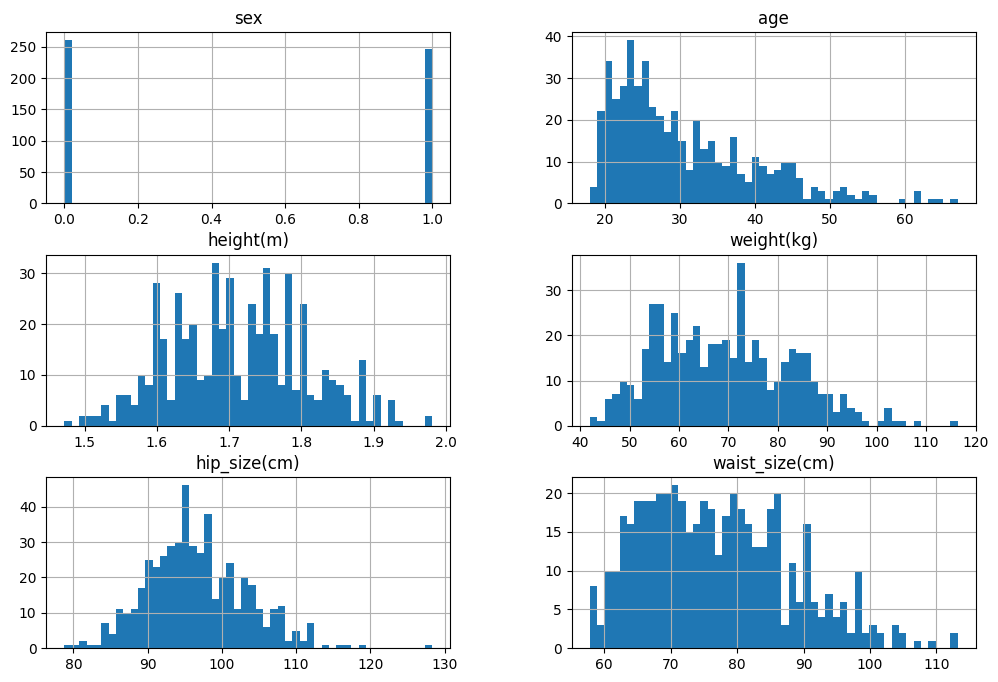

In [9]:
# Understanding the Distribution of the dataset 
dimensions_new.hist(bins=50, figsize=(12,8))
plt.show()

In [10]:
#save the clean data set in the data directory. 
dimensions_new.to_csv("../data/dimensions.csv")

Before continuing any further analysis let us split the data into training and split test.

Split the data, we are going to use stratifying sampling, for our training data set to be representative of the gender of the population. 

In [11]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    dimensions_new, test_size=0.2,
    stratify=dimensions_new['sex'], random_state=42
    )

In [12]:
#let's look at the their proportions. 
strat_test_set['sex'].value_counts()/len(strat_test_set)

sex
0    0.509804
1    0.490196
Name: count, dtype: float64

In [13]:
strat_train_set['sex'].value_counts()/len(strat_train_set)

sex
0    0.51358
1    0.48642
Name: count, dtype: float64

**Exploring and visualizing the data to gain insight**

In [14]:
train_dimensions = strat_train_set.copy()

In [15]:
#Looking for correlation

corr_matrix = train_dimensions.corr(method='spearman')

# Looking at how much each attributes correlate with the waistband and hipsize
print("The correlation existing between each attributes and the waist_size is: ")
print(corr_matrix['waist_size(cm)'].sort_values(ascending=False))
print("\n")
print("The correlation existing between each attributes and the hip_size is: ")
corr_matrix['hip_size(cm)'].sort_values(ascending=False)

The correlation existing between each attributes and the waist_size is: 
waist_size(cm)    1.000000
weight(kg)        0.915300
hip_size(cm)      0.705657
sex               0.695477
height(m)         0.583541
age               0.349130
Name: waist_size(cm), dtype: float64


The correlation existing between each attributes and the hip_size is: 


hip_size(cm)      1.000000
weight(kg)        0.765913
waist_size(cm)    0.705657
height(m)         0.389440
age               0.247501
sex               0.190873
Name: hip_size(cm), dtype: float64

For the waist_size and hip_size, all the attributes has a positive correlation.

**Experimenting correlation with other attributes**

Let us see how the bmi index correlates with the target variables 

In [16]:
train_dimensions['bmi'] = train_dimensions['weight(kg)'] / (train_dimensions['height(m)'])**2
corr_matrix = train_dimensions.corr(method='spearman')
# Looking at how much each attributes correlate with the waistband and hipsize
print("The correlation existing between each attributes and the waist_size is: ")
print(corr_matrix['waist_size(cm)'].sort_values(ascending=False))
print("\n")
print("The correlation existing between each attributes and the hip_size is: ")
corr_matrix['hip_size(cm)'].sort_values(ascending=False)

The correlation existing between each attributes and the waist_size is: 
waist_size(cm)    1.000000
weight(kg)        0.915300
bmi               0.848462
hip_size(cm)      0.705657
sex               0.695477
height(m)         0.583541
age               0.349130
Name: waist_size(cm), dtype: float64


The correlation existing between each attributes and the hip_size is: 


hip_size(cm)      1.000000
bmi               0.787087
weight(kg)        0.765913
waist_size(cm)    0.705657
height(m)         0.389440
age               0.247501
sex               0.190873
Name: hip_size(cm), dtype: float64

The bmi index, has a strong positive correlation with both target variables, indicating that it will be advantageous to include a bmi column, to train our model.

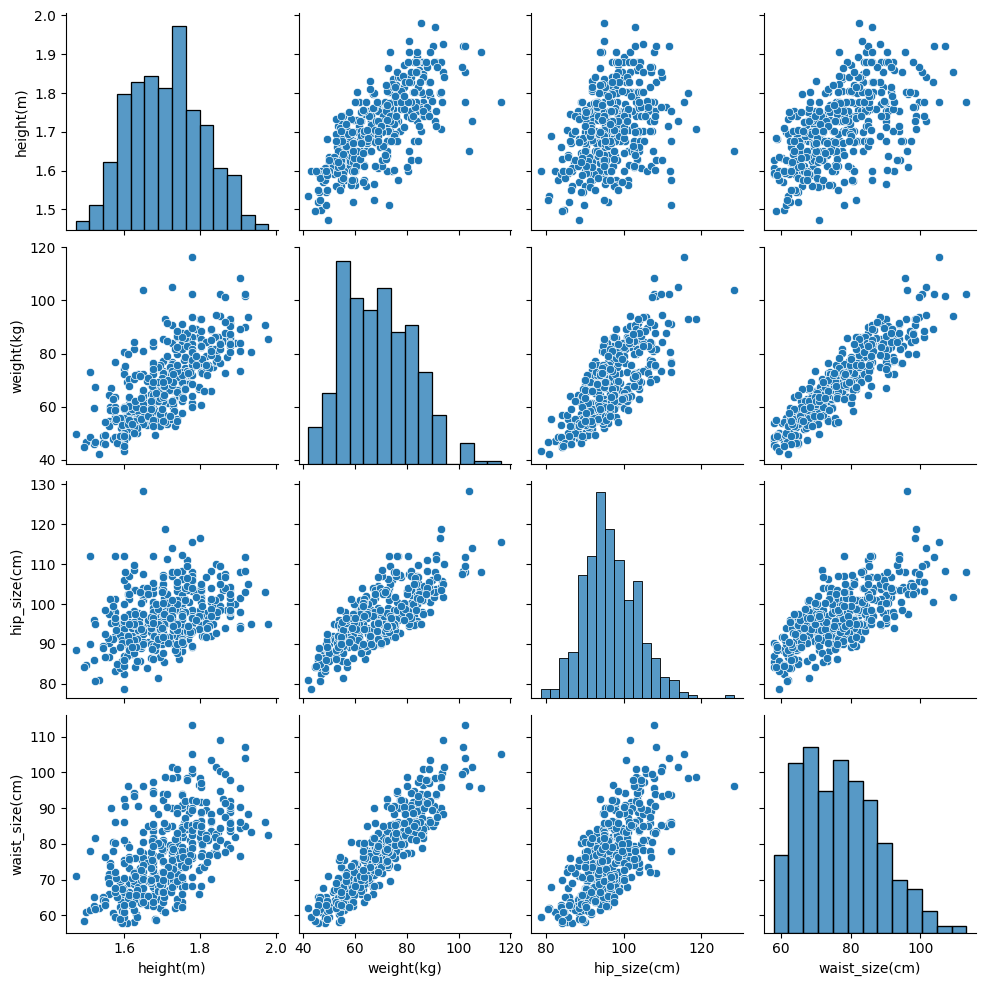

In [17]:

sns.pairplot(train_dimensions, vars=['height(m)', 'weight(kg)', 'hip_size(cm)','waist_size(cm)'])
plt.show()

The majority of this data are postively correlated to each other and linear. Also there exist some outliers indicated on the histogram of the hip_size.

In [18]:
train_dimensions[train_dimensions['hip_size(cm)'] > 120]

,sex,age,height(m),weight(kg),hip_size(cm),waist_size(cm),bmi
473,0,43,1.651,104.1,128.3,96.2,38.190609


This is the only individual i'll remove as an outlier. 

**Preparing the data for the machine learning model.**

In [19]:
train_dimensions = strat_train_set.iloc[:, :4].copy()
train_dimensions_labels = strat_train_set.iloc[:, 4:].copy()

Cleaning the data. 

#Handling outleirs as we said earlier, the indicidual at the index,  473 will be remove


In [20]:
train_dimensions = train_dimensions.drop(index=473)
train_dimensions
train_dimensions_labels = train_dimensions_labels.drop(index=473, axis=0)

In [21]:
for idx, col in enumerate(train_dimensions_labels.columns):
    print(idx, col)

0 hip_size(cm)
1 waist_size(cm)


**Feature scaling and transformation**

We'll proceed by doing functions and pipelines 

In [22]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [23]:
def bmi(X):
    X = np.array(X)
    return X[:, [0]] / (X[:, [1]]**2)
def column_name(function_transformer, feature_names_in):
    return['value'] #feature name out. 
def bmi_pipeline():
    return make_pipeline(
        FunctionTransformer(bmi, feature_names_out=column_name),
        StandardScaler())
    
log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
default_pipeline = make_pipeline(StandardScaler())

preprocessing = ColumnTransformer([
    ('scale', default_pipeline, ['age', 'height(m)', 'weight(kg)']),
    ('log', log_pipeline, ['age']),
    ('bmi', bmi_pipeline(), ['weight(kg)', 'height(m)']),
])

In [24]:
# Applying the transformers on the training data.

train_dimensions_prep = preprocessing.fit_transform(train_dimensions)
preprocessing.get_feature_names_out()


array(['scale__age', 'scale__height(m)', 'scale__weight(kg)', 'log__age',
       'bmi__value'], dtype=object)

**Select and Train a Model**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

models = {
    "lin_reg":  make_pipeline(preprocessing, LinearRegression()),
    "tree_reg":  make_pipeline(preprocessing, RandomForestRegressor()),
    "multi_rf": make_pipeline(preprocessing, MultiOutputRegressor(RandomForestRegressor(), n_jobs=5)),
    "multi_lr": make_pipeline(preprocessing, MultiOutputRegressor(LinearRegression(), n_jobs=5)),
}

In [26]:
def fit_and_error(models, X_train, y_train):
    
    #setting the random seed for reproducibility
    np.random.seed(42)
    
    #make a dictionary to keep the error
    model_error = {}
    
    for name, model in models.items():
        #fit the model to data
        model.fit(X_train, y_train)
        
        #make prediction 
        dimension_pred = model.predict(X_train)
        
        errors = {}
        for idx, col in enumerate(y_train.columns):
            errors[f'{col}_error'] = mean_absolute_error(y_train.iloc[:,idx], dimension_pred[:, idx])
        
        #Evaluate the model and append to its score 
        model_error[name] = errors
        
    return model_error

In [27]:
# Better evaluation 

models = {
    "lin_reg":  make_pipeline(preprocessing, LinearRegression()),
    "tree_reg":  make_pipeline(preprocessing, RandomForestRegressor()),
}

from sklearn.model_selection import cross_val_score
for model in models:
    rmses = -cross_val_score(models[model], train_dimensions, train_dimensions_labels,
    scoring="neg_root_mean_squared_error", cv=5)
    print(pd.Series(rmses).describe())
    

count    5.000000
mean     3.911326
std      0.249245
min      3.533450
25%      3.845409
50%      3.931112
75%      4.048911
max      4.197746
dtype: float64
count    5.000000
mean     4.108612
std      0.307973
min      3.641733
25%      3.995442
50%      4.157638
75%      4.323086
max      4.425161
dtype: float64


In [28]:
fit_and_error(models, train_dimensions,train_dimensions_labels)


{'lin_reg': {'hip_size(cm)_error': 3.004225252828969,
  'waist_size(cm)_error': 3.1154362663839246},
 'tree_reg': {'hip_size(cm)_error': 1.161574381188114,
  'waist_size(cm)_error': 1.2408735561056126}}

Okay, the multi output regressor and the corresponding base estimators produce similar errors and the rf error is smaller than that of the linear regression. It can be an indicator that it can be better model for this regression task. However the error is so small that it may be an indication that is overfit. 

**Fine Tune the Hyper Parameter**

This is to prevent overfittinng of the model 

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])
param_distribs = {
    "random_forest__max_features": randint(low=2, high=20),
    "random_forest__max_depth": randint(low=2, high=6),
    "random_forest__n_estimators": randint(low=90, high=200),
}

rnd_search = RandomizedSearchCV(
full_pipeline, param_distributions=param_distribs,
n_iter=10, cv=5, scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(train_dimensions, train_dimensions_labels)


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'random_forest__max_depth': <scipy.stats....00254734F3BF0>, 'random_forest__max_features': <scipy.stats....00254734F1010>, 'random_forest__n_estimators': <scipy.stats....00254668B6150>}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [41]:
print(rnd_search.best_params_)
final_model = rnd_search.best_estimator_

{'random_forest__max_depth': 5, 'random_forest__max_features': 2, 'random_forest__n_estimators': 165}


In [44]:
feature_importances = final_model['random_forest'].feature_importances_
sorted(zip(feature_importances, final_model['preprocessing'].get_feature_names_out()),
           reverse=True)

[(np.float64(0.471619613922092), 'scale__weight(kg)'),
 (np.float64(0.3712840595168522), 'bmi__value'),
 (np.float64(0.09182984107978519), 'scale__height(m)'),
 (np.float64(0.034106971975143105), 'log__age'),
 (np.float64(0.031159513506127483), 'scale__age')]

**Evaluating the system on the test set**

In [45]:
X_test= strat_test_set.iloc[:, :4].copy()
y_test = strat_test_set.iloc[:, 4:].copy()

final_prediction = final_model.predict(X_test)
final_prediction[:4]
# y_test
# final_rmse = root_mean_squared_error(y_test, final_prediction)
# final_rmse

array([[103.10042164,  97.18104302],
       [ 91.54430147,  66.29940085],
       [100.51688822,  78.2075233 ],
       [ 94.85162854,  69.66731891]])

In [48]:
#Evaluating the model 

for idx, col in enumerate(y_test.columns):
    print(f"{col}_RMSE:", root_mean_squared_error(y_test.iloc[:,idx], final_prediction[:,idx]))


hip_size(cm)_RMSE: 3.490256377070524
waist_size(cm)_RMSE: 4.15450889791266


In [49]:
from sklearn.metrics import r2_score
for idx, col in enumerate(y_test.columns):
    print(f"{col}_r2:", r2_score(y_test.iloc[:,idx], final_prediction[:,idx]))

hip_size(cm)_r2: 0.6308533039879056
waist_size(cm)_r2: 0.8558186056710613


In [36]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(train_dimensions, train_dimensions_labels)
prediction = lin_reg.predict(X_test)


for idx, col in enumerate(y_test.columns):
    print(f"{col}_RMSE:", root_mean_squared_error(y_test.iloc[:,idx], prediction[:,idx]))
    
from sklearn.metrics import r2_score
for idx, col in enumerate(y_test.columns):
    print(f"{col}_r2:", r2_score(y_test.iloc[:,idx], prediction[:,idx]))

hip_size(cm)_RMSE: 3.553829692369084
waist_size(cm)_RMSE: 4.174708674279684
hip_size(cm)_r2: 0.6172831792070881
waist_size(cm)_r2: 0.8544131388350553


In [53]:
my_info = pd.DataFrame([[0, 45, 1.60, 85]],
                            columns=['sex', 'age', 'height(m)', 'weight(kg)'])
waist_size = round(final_model.predict(my_info)[0, 1], 2)
hip_size = round(final_model.predict(my_info)[0, 0], 2)
print(f"Your estimated waistband is {waist_size}cm and the estimated hip_size is {hip_size}cm")


Your estimated waistband is 92.95cm and the estimated hip_size is 106.44cm


In [6]:
import numpy as np
import pandas as pd
bar = pd.DataFrame(
    np.random.randint(3,20, size=(10,3)), columns=['a', 'b', 'c']
)
bar

,a,b,c
0,17,19,3
1,3,11,9
2,5,3,17
3,7,4,8
4,13,11,3
5,3,16,8
6,12,18,18
7,9,16,7
8,5,12,3
9,14,16,6
